# **k-Nearest Neighbors (k-NN)**  
### *k-najbliższych sąsiadów*

---

## **English**

k-Nearest Neighbors (k-NN) is a simple, non-parametric, lazy learning algorithm used for both classification and regression. It makes predictions based on the k closest training examples in the feature space. The algorithm assumes that similar things exist in close proximity.

### **Key Concepts**

1. **Instance-Based Learning**: Stores all training data and makes decisions based on similarity
2. **Lazy Learning**: No explicit training phase; computation happens during prediction
3. **Non-Parametric**: Makes no assumptions about the underlying data distribution
4. **Distance-Based**: Uses distance metrics to find nearest neighbors

### **Algorithm Steps**

1. **Store Training Data**: Keep all training examples in memory
2. **Calculate Distances**: For a new point, calculate distances to all training points
3. **Find k-Nearest**: Select k closest neighbors based on distance metric
4. **Make Prediction**: 
   - **Classification**: Majority vote among k neighbors
   - **Regression**: Average of k neighbors' values

### **Distance Metrics**

#### **Euclidean Distance** (most common)
$$
d(x, y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}
$$

#### **Manhattan Distance**
$$
d(x, y) = \sum_{i=1}^{n}|x_i - y_i|
$$

#### **Minkowski Distance** (generalized)
$$
d(x, y) = \left(\sum_{i=1}^{n}|x_i - y_i|^p\right)^{1/p}
$$

### **Hyperparameters**

- **k (n_neighbors)**: Number of neighbors to consider
- **weights**: 'uniform' or 'distance' (closer neighbors have more influence)
- **metric**: Distance metric ('euclidean', 'manhattan', 'minkowski')
- **p**: Parameter for Minkowski metric

### **Choosing k**

- **k = 1**: Very flexible, prone to noise and overfitting
- **Small k**: Low bias, high variance, sensitive to noise
- **Large k**: High bias, low variance, smoother decision boundaries
- **k = n**: Always predicts the majority class (underfitting)

### **Advantages**
- **Simple to understand and implement**
- **No assumptions about data distribution**
- **Works well with small datasets**
- **Can be used for both classification and regression**
- **Naturally handles multi-class problems**

### **Disadvantages**
- **Computationally expensive for large datasets**
- **Sensitive to irrelevant features (curse of dimensionality)**
- **Requires feature scaling**
- **Sensitive to local structure of data**
- **Memory intensive (stores all training data)**

### **Applications**
- **Recommendation Systems**: Finding similar users/items
- **Pattern Recognition**: Image and text classification
- **Anomaly Detection**: Identifying outliers
- **Missing Value Imputation**: Filling missing data

---

## **Polish**

k-najbliższych sąsiadów (k-NN) to prosty, nieparametryczny algorytm leniwego uczenia używany zarówno do klasyfikacji, jak i regresji. Dokonuje przewidywań na podstawie k najbliższych przykładów treningowych w przestrzeni cech. Algorytm zakłada, że podobne rzeczy istnieją w bliskiej odległości.

### **Kluczowe pojęcia**

1. **Uczenie oparte na instancjach**: Przechowuje wszystkie dane treningowe i podejmuje decyzje na podstawie podobieństwa
2. **Leniwe uczenie**: Brak jawnej fazy treningu; obliczenia następują podczas przewidywania
3. **Nieparametryczny**: Nie czyni założeń o rozkładzie danych podstawowych
4. **Oparty na odległości**: Używa metryk odległości do znajdowania najbliższych sąsiadów

### **Kroki algorytmu**

1. **Przechowywanie danych treningowych**: Zachowanie wszystkich przykładów treningowych w pamięci
2. **Obliczanie odległości**: Dla nowego punktu, obliczenie odległości do wszystkich punktów treningowych
3. **Znajdowanie k-najbliższych**: Wybór k najbliższych sąsiadów na podstawie metryki odległości
4. **Przewidywanie**: 
   - **Klasyfikacja**: Głosowanie większości wśród k sąsiadów
   - **Regresja**: Średnia z wartości k sąsiadów

### **Metryki odległości**

#### **Odległość euklidesowa** (najczęstsza)
$$
d(x, y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}
$$

#### **Odległość Manhattan**
$$
d(x, y) = \sum_{i=1}^{n}|x_i - y_i|
$$

#### **Odległość Minkowskiego** (uogólniona)
$$
d(x, y) = \left(\sum_{i=1}^{n}|x_i - y_i|^p\right)^{1/p}
$$

### **Hiperparametry**

- **k (n_neighbors)**: Liczba sąsiadów do rozważenia
- **weights**: 'uniform' lub 'distance' (bliżsi sąsiedzi mają większy wpływ)
- **metric**: Metryka odległości ('euclidean', 'manhattan', 'minkowski')
- **p**: Parametr dla metryki Minkowskiego

### **Wybór k**

- **k = 1**: Bardzo elastyczny, podatny na szum i przeuczenie
- **Małe k**: Niski bias, wysoka wariancja, wrażliwy na szum
- **Duże k**: Wysoki bias, niska wariancja, gładsze granice decyzyjne
- **k = n**: Zawsze przewiduje klasę większościową (niedouczenie)

### **Zalety**
- **Prosty do zrozumienia i implementacji**
- **Brak założeń o rozkładzie danych**
- **Dobrze działa z małymi zbiorami danych**
- **Może być używany zarówno do klasyfikacji, jak i regresji**
- **Naturalnie obsługuje problemy wieloklasowe**

### **Wady**
- **Kosztowny obliczeniowo dla dużych zbiorów danych**
- **Wrażliwy na nieistotne cechy (przekleństwo wymiarowości)**
- **Wymaga skalowania cech**
- **Wrażliwy na lokalną strukturę danych**
- **Intensywny pamięciowo (przechowuje wszystkie dane treningowe)**

### **Zastosowania**
- **Systemy rekomendacyjne**: Znajdowanie podobnych użytkowników/elementów
- **Rozpoznawanie wzorców**: Klasyfikacja obrazów i tekstu
- **Wykrywanie anomalii**: Identyfikacja wartości odstających
- **Imputacja brakujących wartości**: Wypełnianie brakujących danych


In [1]:
# Import required libraries / Importowanie wymaganych bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, load_iris, load_wine
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Set style for plots / Ustawienie stylu wykresów
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


## **1. Dataset Creation and Exploration**
### *Tworzenie i eksploracja zbioru danych*

We'll start with a synthetic 2D dataset to visualize how k-NN works, then move to real datasets.

Zaczniemy od syntetycznego zbioru danych 2D, aby zwizualizować działanie k-NN, a następnie przejdziemy do rzeczywistych zbiorów danych.


In [2]:
# Create synthetic 2D dataset / Tworzenie syntetycznego zbioru danych 2D
np.random.seed(42)
X_synthetic, y_synthetic = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42
)

# Create DataFrame for easier handling / Tworzenie DataFrame dla łatwiejszej obsługi
df_synthetic = pd.DataFrame(X_synthetic, columns=['Feature_1', 'Feature_2'])
df_synthetic['Target'] = y_synthetic

print("Synthetic Dataset Shape / Kształt syntetycznego zbioru danych:", df_synthetic.shape)
print("\nFirst 5 rows / Pierwsze 5 wierszy:")
print(df_synthetic.head())

print("\nClass distribution / Rozkład klas:")
print(df_synthetic['Target'].value_counts())


Synthetic Dataset Shape / Kształt syntetycznego zbioru danych: (200, 3)

First 5 rows / Pierwsze 5 wierszy:
   Feature_1  Feature_2  Target
0  -0.872929   0.013042       1
1   1.312935   2.770534       1
2   2.340428   2.420996       1
3   2.294548  -0.404380       1
4   0.944105   0.477241       1

Class distribution / Rozkład klas:
Target
1    100
0    100
Name: count, dtype: int64


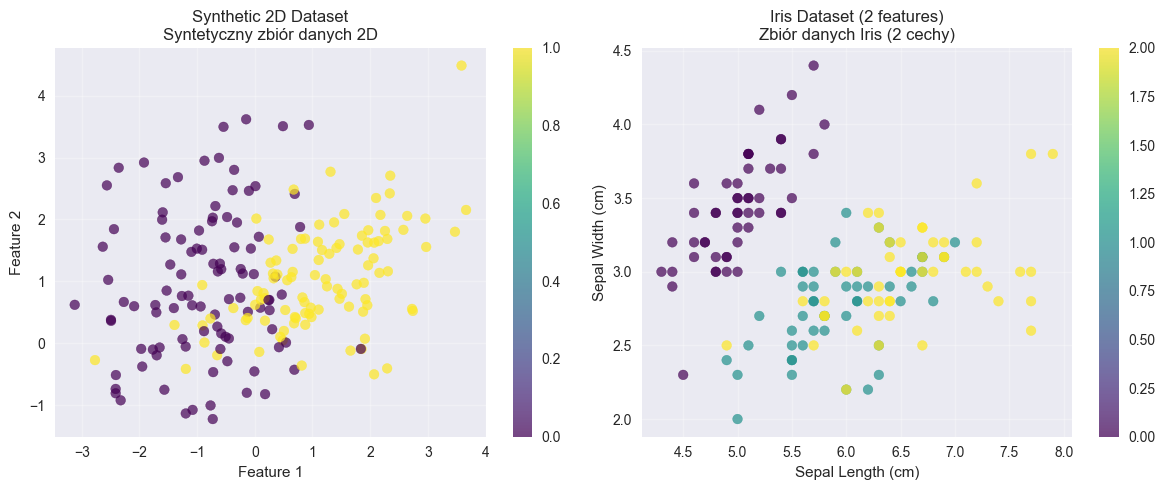

Iris dataset classes / Klasy zbioru danych Iris: ['setosa' 'versicolor' 'virginica']


In [3]:
# Visualize the synthetic dataset / Wizualizacja syntetycznego zbioru danych
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(X_synthetic[:, 0], X_synthetic[:, 1], c=y_synthetic, cmap='viridis', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic 2D Dataset\nSyntetyczny zbiór danych 2D')
plt.colorbar(scatter)
plt.grid(True, alpha=0.3)

# Load and visualize Iris dataset / Wczytanie i wizualizacja zbioru danych Iris
iris = load_iris()
X_iris = iris.data[:, :2]  # Use only first 2 features for visualization
y_iris = iris.target

plt.subplot(1, 2, 2)
scatter = plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, cmap='viridis', alpha=0.7)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset (2 features)\nZbiór danych Iris (2 cechy)')
plt.colorbar(scatter)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Iris dataset classes / Klasy zbioru danych Iris:", iris.target_names)


## **2. Basic k-NN Implementation**
### *Podstawowa implementacja k-NN*

Let's implement k-NN with different values of k and observe the effect on decision boundaries.

Zaimplementujmy k-NN z różnymi wartościami k i obserwujmy wpływ na granice decyzyjne.


In [4]:
# Split the synthetic dataset / Podział syntetycznego zbioru danych
X_train, X_test, y_train, y_test = train_test_split(
    X_synthetic, y_synthetic, test_size=0.3, random_state=42, stratify=y_synthetic
)

print(f"Training set size / Rozmiar zbioru treningowego: {X_train.shape[0]}")
print(f"Test set size / Rozmiar zbioru testowego: {X_test.shape[0]}")

# Function to plot decision boundaries / Funkcja do rysowania granic decyzyjnych
def plot_decision_boundary(X, y, classifier, title, ax):
    """Plot decision boundary for 2D data"""
    h = 0.02  # step size in the mesh
    
    # Create a mesh to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Make predictions on the mesh
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='black', alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.grid(True, alpha=0.3)
    
    return scatter


Training set size / Rozmiar zbioru treningowego: 140
Test set size / Rozmiar zbioru testowego: 60


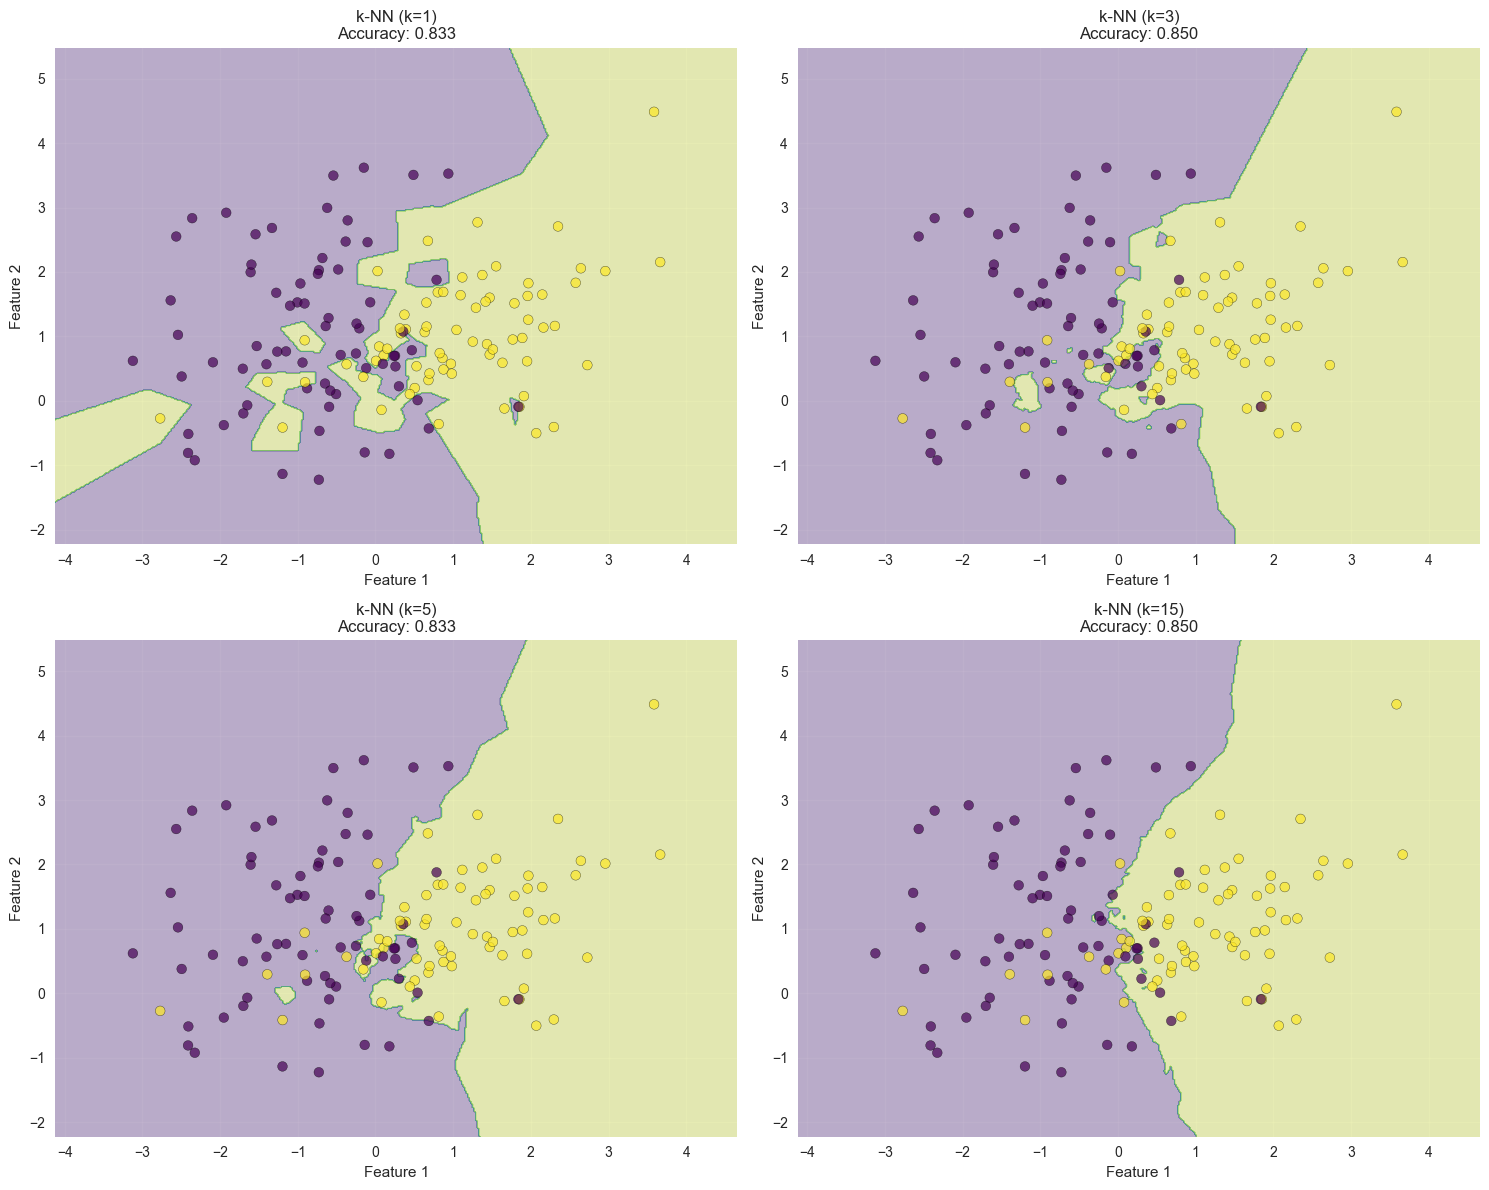

\nAccuracy Comparison / Porównanie dokładności:
----------------------------------------
k =  1: 0.833
k =  3: 0.850
k =  5: 0.833
k = 15: 0.850
\nBest k value / Najlepsza wartość k: 3


In [5]:
# Compare different k values / Porównanie różnych wartości k
k_values = [1, 3, 5, 15]
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

accuracies = []

for i, k in enumerate(k_values):
    # Create and train k-NN classifier / Tworzenie i trenowanie klasyfikatora k-NN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Make predictions / Przewidywania
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Plot decision boundary / Rysowanie granicy decyzyjnej
    title = f'k-NN (k={k})\nAccuracy: {accuracy:.3f}'
    plot_decision_boundary(X_train, y_train, knn, title, axes[i])

plt.tight_layout()
plt.show()

# Print accuracy comparison / Wyświetlenie porównania dokładności
print("\\nAccuracy Comparison / Porównanie dokładności:")
print("-" * 40)
for k, acc in zip(k_values, accuracies):
    print(f"k = {k:2d}: {acc:.3f}")
    
print(f"\\nBest k value / Najlepsza wartość k: {k_values[np.argmax(accuracies)]}")


## **3. Distance Metrics Comparison**
### *Porównanie metryk odległości*

k-NN performance can vary significantly based on the distance metric used. Let's compare different metrics.

Wydajność k-NN może znacznie się różnić w zależności od używanej metryki odległości. Porównajmy różne metryki.


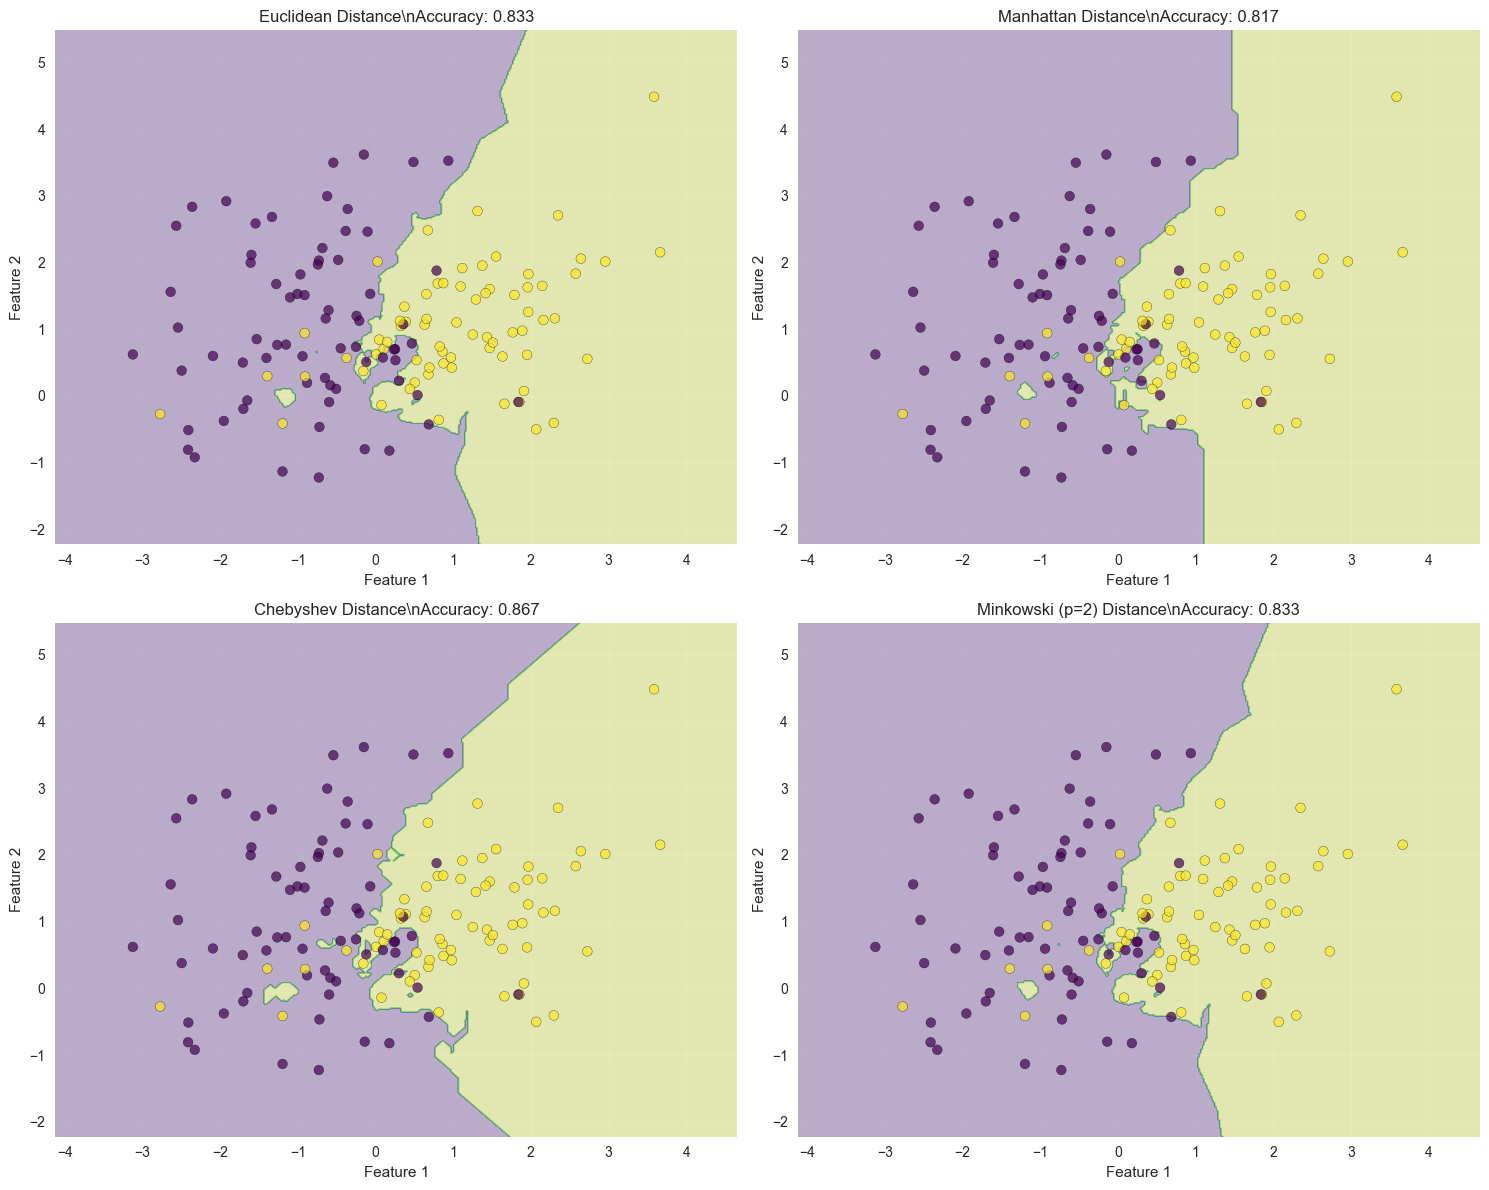

\nDistance Metric Comparison / Porównanie metryk odległości:
--------------------------------------------------
Euclidean      : 0.833
Manhattan      : 0.817
Chebyshev      : 0.867
Minkowski (p=2): 0.833
\nBest metric / Najlepsza metryka: Chebyshev


In [6]:
# Compare different distance metrics / Porównanie różnych metryk odległości
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
metric_names = ['Euclidean', 'Manhattan', 'Chebyshev', 'Minkowski (p=2)']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

metric_accuracies = []

for i, (metric, name) in enumerate(zip(metrics, metric_names)):
    # Create k-NN with specific metric / Tworzenie k-NN z konkretną metryką
    if metric == 'minkowski':
        knn = KNeighborsClassifier(n_neighbors=5, metric=metric, p=2)
    else:
        knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    metric_accuracies.append(accuracy)
    
    # Plot decision boundary / Rysowanie granicy decyzyjnej
    title = f'{name} Distance\\nAccuracy: {accuracy:.3f}'
    plot_decision_boundary(X_train, y_train, knn, title, axes[i])

plt.tight_layout()
plt.show()

# Print metric comparison / Wyświetlenie porównania metryk
print("\\nDistance Metric Comparison / Porównanie metryk odległości:")
print("-" * 50)
for name, acc in zip(metric_names, metric_accuracies):
    print(f"{name:15}: {acc:.3f}")
    
best_metric_idx = np.argmax(metric_accuracies)
print(f"\\nBest metric / Najlepsza metryka: {metric_names[best_metric_idx]}")


## **4. Feature Scaling Impact**
### *Wpływ skalowania cech*

k-NN is sensitive to feature scales. Let's demonstrate the importance of feature scaling.

k-NN jest wrażliwy na skale cech. Pokażmy znaczenie skalowania cech.


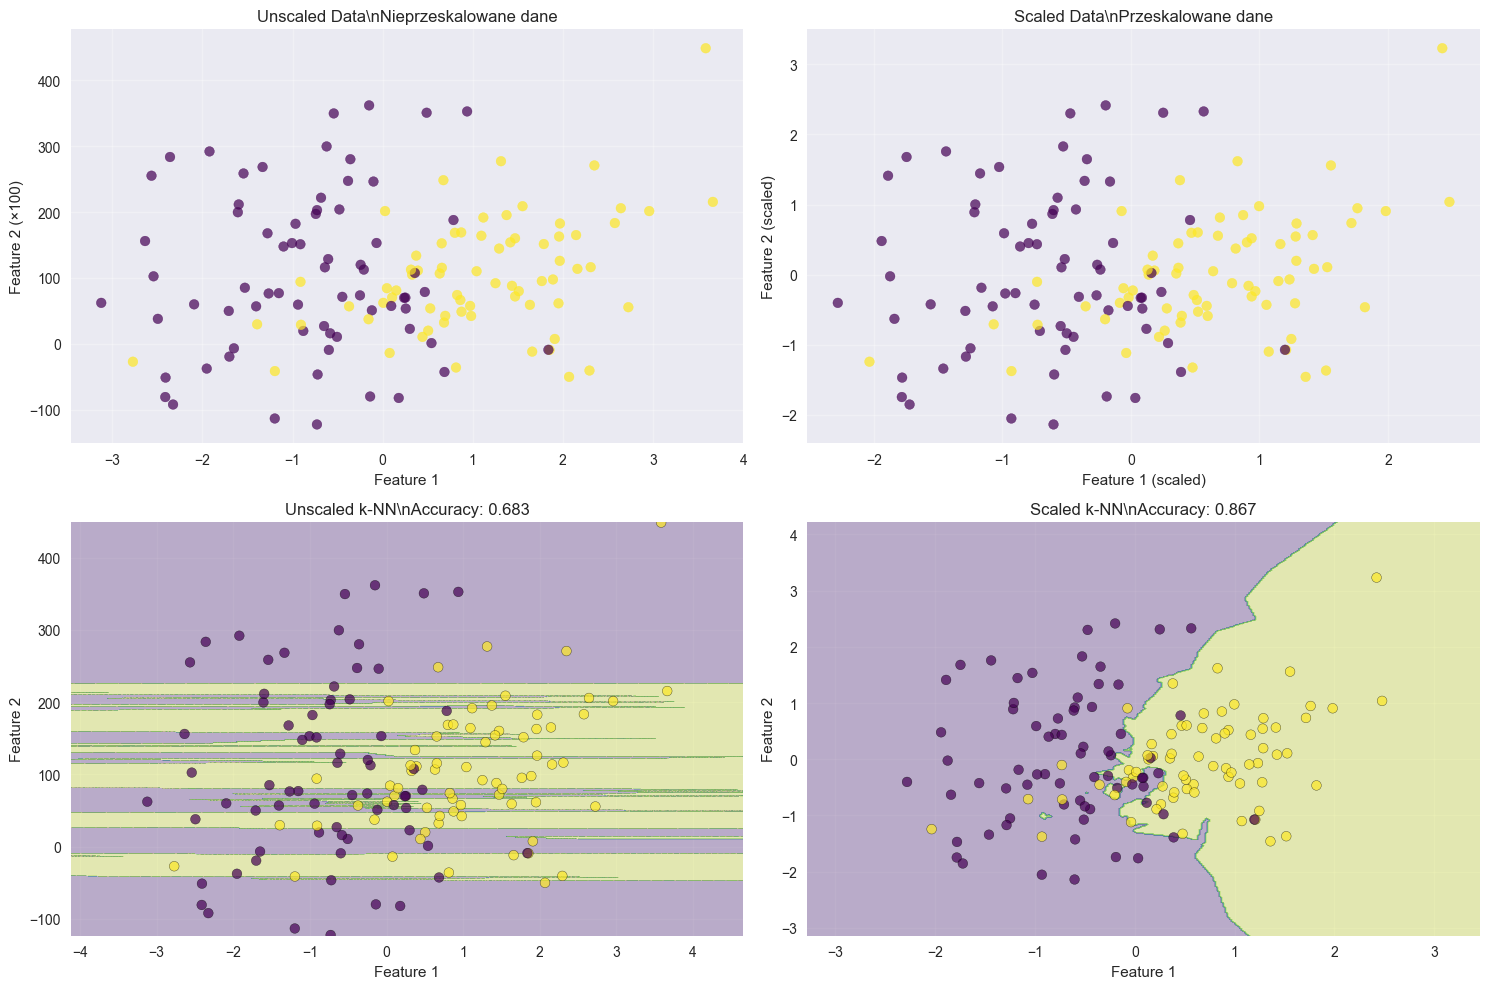

Feature Scaling Impact / Wpływ skalowania cech:
---------------------------------------------
Unscaled accuracy / Dokładność bez skalowania: 0.683
Scaled accuracy / Dokładność ze skalowaniem:   0.867
Improvement / Poprawa: 0.183


In [7]:
# Create dataset with different scales / Tworzenie zbioru danych z różnymi skalami
X_scaled_demo = X_synthetic.copy()
X_scaled_demo[:, 1] = X_scaled_demo[:, 1] * 100  # Scale second feature by 100

# Split the scaled data / Podział przeskalowanych danych
X_train_unscaled, X_test_unscaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled_demo, y_synthetic, test_size=0.3, random_state=42, stratify=y_synthetic
)

# Create scaler / Tworzenie skalera
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_unscaled)
X_test_scaled = scaler.transform(X_test_unscaled)

# Compare unscaled vs scaled / Porównanie nieprzeskalowanych vs przeskalowanych
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Unscaled data visualization / Wizualizacja nieprzeskalowanych danych
axes[0, 0].scatter(X_train_unscaled[:, 0], X_train_unscaled[:, 1], c=y_train_scaled, cmap='viridis', alpha=0.7)
axes[0, 0].set_title('Unscaled Data\\nNieprzeskalowane dane')
axes[0, 0].set_xlabel('Feature 1')
axes[0, 0].set_ylabel('Feature 2 (×100)')
axes[0, 0].grid(True, alpha=0.3)

# Scaled data visualization / Wizualizacja przeskalowanych danych
axes[0, 1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train_scaled, cmap='viridis', alpha=0.7)
axes[0, 1].set_title('Scaled Data\\nPrzeskalowane dane')
axes[0, 1].set_xlabel('Feature 1 (scaled)')
axes[0, 1].set_ylabel('Feature 2 (scaled)')
axes[0, 1].grid(True, alpha=0.3)

# Train k-NN on unscaled data / Trenowanie k-NN na nieprzeskalowanych danych
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train_unscaled, y_train_scaled)
y_pred_unscaled = knn_unscaled.predict(X_test_unscaled)
acc_unscaled = accuracy_score(y_test_scaled, y_pred_unscaled)

# Train k-NN on scaled data / Trenowanie k-NN na przeskalowanych danych
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test_scaled, y_pred_scaled)

# Plot decision boundaries / Rysowanie granic decyzyjnych
plot_decision_boundary(X_train_unscaled, y_train_scaled, knn_unscaled, 
                      f'Unscaled k-NN\\nAccuracy: {acc_unscaled:.3f}', axes[1, 0])

plot_decision_boundary(X_train_scaled, y_train_scaled, knn_scaled, 
                      f'Scaled k-NN\\nAccuracy: {acc_scaled:.3f}', axes[1, 1])

plt.tight_layout()
plt.show()

print("Feature Scaling Impact / Wpływ skalowania cech:")
print("-" * 45)
print(f"Unscaled accuracy / Dokładność bez skalowania: {acc_unscaled:.3f}")
print(f"Scaled accuracy / Dokładność ze skalowaniem:   {acc_scaled:.3f}")
print(f"Improvement / Poprawa: {acc_scaled - acc_unscaled:.3f}")


## **5. Hyperparameter Tuning**
### *Strojenie hiperparametrów*

Let's find the optimal k value using cross-validation and grid search.

Znajdźmy optymalną wartość k używając walidacji krzyżowej i przeszukiwania siatki.


Optimal k value / Optymalna wartość k: 4
Best CV score / Najlepszy wynik CV: 0.843
\nGrid Search Results / Wyniki przeszukiwania siatki:
--------------------------------------------------
Best parameters / Najlepsze parametry: {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'uniform'}
Best CV score / Najlepszy wynik CV: 0.850


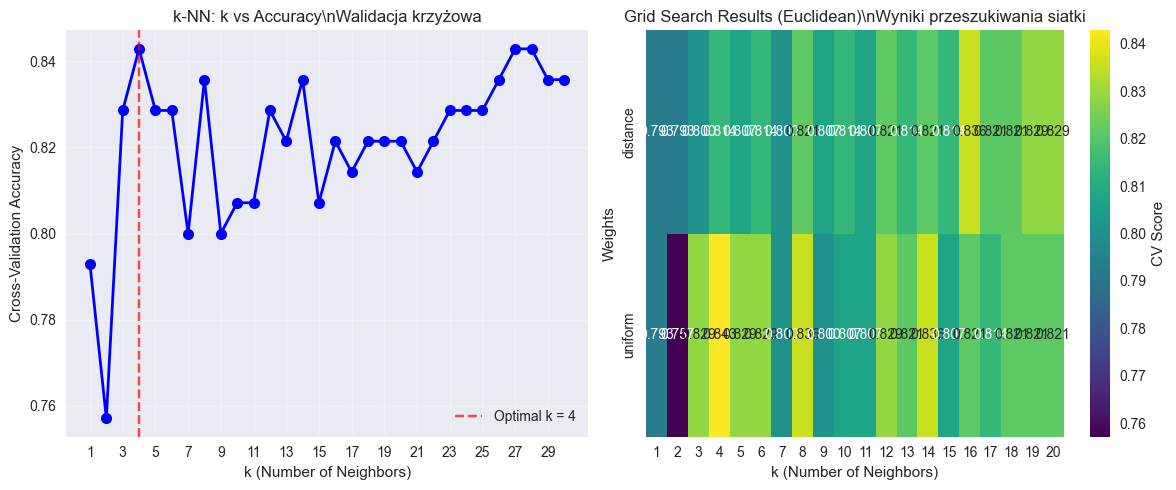

In [8]:
# Find optimal k using cross-validation / Znajdowanie optymalnego k używając walidacji krzyżowej
k_range = range(1, 31)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot k vs accuracy / Wykres k vs dokładność
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, cv_scores, 'bo-', linewidth=2, markersize=8)
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('k-NN: k vs Accuracy\\nWalidacja krzyżowa')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 31, 2))

# Find optimal k / Znajdowanie optymalnego k
optimal_k = k_range[np.argmax(cv_scores)]
max_score = max(cv_scores)

plt.axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7, 
           label=f'Optimal k = {optimal_k}')
plt.legend()

print(f"Optimal k value / Optymalna wartość k: {optimal_k}")
print(f"Best CV score / Najlepszy wynik CV: {max_score:.3f}")

# Grid search for comprehensive hyperparameter tuning / Grid search dla kompleksowego strojenia
param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = KNeighborsClassifier()
grid_search = GridSearchCV(knn_grid, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\\nGrid Search Results / Wyniki przeszukiwania siatki:")
print("-" * 50)
print(f"Best parameters / Najlepsze parametry: {grid_search.best_params_}")
print(f"Best CV score / Najlepszy wynik CV: {grid_search.best_score_:.3f}")

# Visualize grid search results / Wizualizacja wyników grid search
results_df = pd.DataFrame(grid_search.cv_results_)

# Create heatmap for euclidean metric / Tworzenie mapy ciepła dla metryki euklidesowej
plt.subplot(1, 2, 2)
euclidean_results = results_df[results_df['param_metric'] == 'euclidean']

# Pivot table for heatmap / Tabela przestawna dla mapy ciepła
heatmap_data = euclidean_results.pivot_table(
    values='mean_test_score', 
    index='param_weights', 
    columns='param_n_neighbors'
)

sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='viridis', cbar_kws={'label': 'CV Score'})
plt.title('Grid Search Results (Euclidean)\\nWyniki przeszukiwania siatki')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Weights')

plt.tight_layout()
plt.show()


## **6. Real-World Example: Wine Dataset**
### *Przykład z prawdziwego świata: Zbiór danych Wine*

Let's apply k-NN to a real multiclass classification problem using the Wine dataset.

Zastosujmy k-NN do rzeczywistego problemu klasyfikacji wieloklasowej używając zbioru danych Wine.


In [9]:
# Load Wine dataset / Wczytanie zbioru danych Wine
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

print("Wine Dataset Information / Informacje o zbiorze danych Wine:")
print("-" * 55)
print(f"Number of samples / Liczba próbek: {X_wine.shape[0]}")
print(f"Number of features / Liczba cech: {X_wine.shape[1]}")
print(f"Number of classes / Liczba klas: {len(wine.target_names)}")
print(f"Classes / Klasy: {wine.target_names}")

# Create DataFrame for easier analysis / Tworzenie DataFrame dla łatwiejszej analizy
wine_df = pd.DataFrame(X_wine, columns=wine.feature_names)
wine_df['target'] = y_wine

print("\\nClass distribution / Rozkład klas:")
print(wine_df['target'].value_counts().sort_index())

# Display feature statistics / Wyświetlenie statystyk cech
print("\\nFeature statistics (first 5 features) / Statystyki cech (pierwsze 5 cech):")
print(wine_df.iloc[:, :5].describe())


Wine Dataset Information / Informacje o zbiorze danych Wine:
-------------------------------------------------------
Number of samples / Liczba próbek: 178
Number of features / Liczba cech: 13
Number of classes / Liczba klas: 3
Classes / Klasy: ['class_0' 'class_1' 'class_2']
\nClass distribution / Rozkład klas:
target
0    59
1    71
2    48
Name: count, dtype: int64
\nFeature statistics (first 5 features) / Statystyki cech (pierwsze 5 cech):
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium
count  178.000000  178.000000  178.000000         178.000000  178.000000
mean    13.000618    2.336348    2.366517          19.494944   99.741573
std      0.811827    1.117146    0.274344           3.339564   14.282484
min     11.030000    0.740000    1.360000          10.600000   70.000000
25%     12.362500    1.602500    2.210000          17.200000   88.000000
50%     13.050000    1.865000    2.360000          19.500000   98.000000
75%     13.677500    3.082500    2.557500

In [10]:
# Split the wine dataset / Podział zbioru danych Wine
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine, y_wine, test_size=0.3, random_state=42, stratify=y_wine
)

# Create pipeline with scaling and k-NN / Tworzenie pipeline ze skalowaniem i k-NN
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Define parameter grid for pipeline / Definicja siatki parametrów dla pipeline
param_grid_pipeline = {
    'knn__n_neighbors': range(1, 21),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

# Perform grid search / Wykonanie przeszukiwania siatki
grid_search_wine = GridSearchCV(
    pipeline, param_grid_pipeline, cv=5, scoring='accuracy', n_jobs=-1
)
grid_search_wine.fit(X_train_wine, y_train_wine)

print("Wine Dataset - Grid Search Results / Wyniki przeszukiwania siatki:")
print("-" * 65)
print(f"Best parameters / Najlepsze parametry: {grid_search_wine.best_params_}")
print(f"Best CV score / Najlepszy wynik CV: {grid_search_wine.best_score_:.3f}")

# Train final model with best parameters / Trenowanie końcowego modelu z najlepszymi parametrami
best_model = grid_search_wine.best_estimator_
y_pred_wine = best_model.predict(X_test_wine)

# Calculate final accuracy / Obliczenie końcowej dokładności
final_accuracy = accuracy_score(y_test_wine, y_pred_wine)
print(f"\\nTest accuracy / Dokładność testowa: {final_accuracy:.3f}")

# Detailed classification report / Szczegółowy raport klasyfikacji
print("\\nClassification Report / Raport klasyfikacji:")
print("-" * 45)
print(classification_report(y_test_wine, y_pred_wine, target_names=wine.target_names))


Wine Dataset - Grid Search Results / Wyniki przeszukiwania siatki:
-----------------------------------------------------------------
Best parameters / Najlepsze parametry: {'knn__metric': 'manhattan', 'knn__n_neighbors': 6, 'knn__weights': 'uniform'}
Best CV score / Najlepszy wynik CV: 0.976
\nTest accuracy / Dokładność testowa: 0.963
\nClassification Report / Raport klasyfikacji:
---------------------------------------------
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       1.00      0.90      0.95        21
     class_2       0.94      1.00      0.97        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



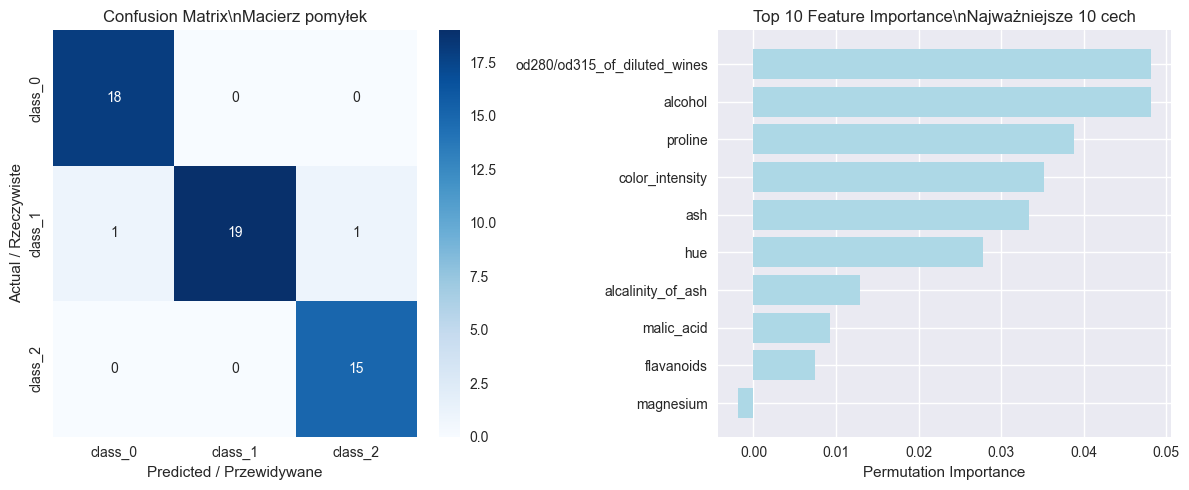

\nTop 5 Most Important Features / 5 najważniejszych cech:
--------------------------------------------------
1. od280/od315_of_diluted_wines: 0.048
2. alcohol: 0.048
3. proline: 0.039
4. color_intensity: 0.035
5. ash: 0.033


In [11]:
# Visualize confusion matrix / Wizualizacja macierzy pomyłek
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test_wine, y_pred_wine)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title('Confusion Matrix\\nMacierz pomyłek')
plt.xlabel('Predicted / Przewidywane')
plt.ylabel('Actual / Rzeczywiste')

# Feature importance analysis using permutation / Analiza ważności cech używając permutacji
from sklearn.inspection import permutation_importance

# Calculate permutation importance / Obliczenie ważności permutacji
perm_importance = permutation_importance(best_model, X_test_wine, y_test_wine, 
                                        n_repeats=10, random_state=42)

# Get feature names and importance scores / Otrzymanie nazw cech i wyników ważności
feature_names = wine.feature_names
importance_scores = perm_importance.importances_mean

# Sort features by importance / Sortowanie cech według ważności
sorted_idx = np.argsort(importance_scores)[::-1]

plt.subplot(1, 2, 2)
plt.barh(range(10), importance_scores[sorted_idx][:10], color='lightblue')
plt.yticks(range(10), [feature_names[i] for i in sorted_idx[:10]])
plt.xlabel('Permutation Importance')
plt.title('Top 10 Feature Importance\\nNajważniejsze 10 cech')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

print("\\nTop 5 Most Important Features / 5 najważniejszych cech:")
print("-" * 50)
for i in range(5):
    idx = sorted_idx[i]
    print(f"{i+1}. {feature_names[idx]}: {importance_scores[idx]:.3f}")


## **7. Performance Analysis and Comparison**
### *Analiza wydajności i porównanie*

Let's compare k-NN with other algorithms and analyze its computational complexity.

Porównajmy k-NN z innymi algorytmami i przeanalizujmy jego złożoność obliczeniową.


In [12]:
# Compare k-NN with other algorithms / Porównanie k-NN z innymi algorytmami
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import time

# Define algorithms to compare / Definicja algorytmów do porównania
algorithms = {
    'k-NN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Naive Bayes': GaussianNB()
}

# Compare algorithms on Wine dataset / Porównanie algorytmów na zbiorze danych Wine
results = []

for name, algorithm in algorithms.items():
    # Create pipeline with scaling / Tworzenie pipeline ze skalowaniem
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', algorithm)
    ])
    
    # Measure training time / Pomiar czasu trenowania
    start_time = time.time()
    pipe.fit(X_train_wine, y_train_wine)
    training_time = time.time() - start_time
    
    # Measure prediction time / Pomiar czasu przewidywania
    start_time = time.time()
    y_pred = pipe.predict(X_test_wine)
    prediction_time = time.time() - start_time
    
    # Calculate accuracy / Obliczenie dokładności
    accuracy = accuracy_score(y_test_wine, y_pred)
    
    # Cross-validation score / Wynik walidacji krzyżowej
    cv_scores = cross_val_score(pipe, X_train_wine, y_train_wine, cv=5)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    results.append({
        'Algorithm': name,
        'Test Accuracy': accuracy,
        'CV Mean': cv_mean,
        'CV Std': cv_std,
        'Training Time (s)': training_time,
        'Prediction Time (s)': prediction_time
    })

# Create results DataFrame / Tworzenie DataFrame z wynikami
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Test Accuracy', ascending=False)

print("Algorithm Comparison on Wine Dataset / Porównanie algorytmów na zbiorze Wine:")
print("=" * 80)
print(results_df.to_string(index=False, float_format='%.4f'))


Algorithm Comparison on Wine Dataset / Porównanie algorytmów na zbiorze Wine:
          Algorithm  Test Accuracy  CV Mean  CV Std  Training Time (s)  Prediction Time (s)
      Random Forest         1.0000   0.9673  0.0310             0.0838               0.0000
        Naive Bayes         1.0000   0.9597  0.0253             0.0000               0.0000
                SVM         0.9815   0.9920  0.0160             0.0000               0.0000
Logistic Regression         0.9815   0.9837  0.0200             0.0120               0.0000
               k-NN         0.9444   0.9593  0.0365             0.0016               0.0030


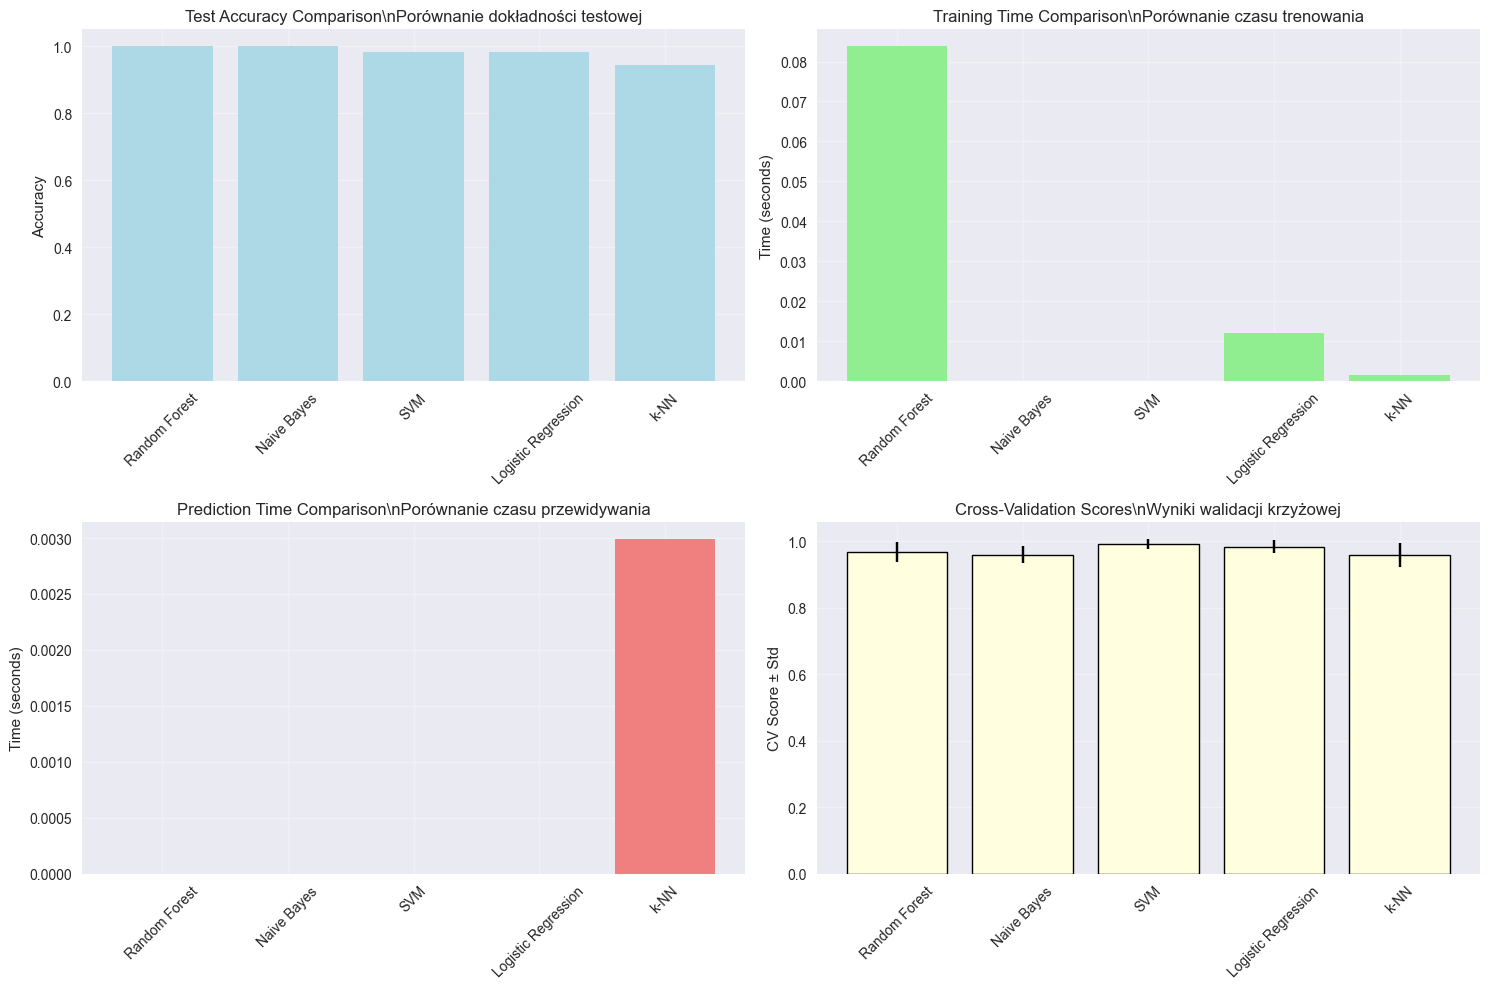

\nk-NN Computational Complexity Analysis:
Analiza złożoności obliczeniowej k-NN:
Training Phase / Faza trenowania:
  - Time Complexity / Złożoność czasowa: O(1) - just stores data
  - Space Complexity / Złożoność przestrzenna: O(n×d) - stores all training data
\nPrediction Phase / Faza przewidywania:
  - Time Complexity / Złożoność czasowa: O(n×d) - calculates distances to all points
  - Space Complexity / Złożoność przestrzenna: O(k) - stores k nearest neighbors
\nWhere / Gdzie:
  - n = number of training samples / liczba próbek treningowych
  - d = number of features / liczba cech
  - k = number of neighbors / liczba sąsiadów


In [13]:
# Visualize algorithm comparison / Wizualizacja porównania algorytmów
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Accuracy comparison / Porównanie dokładności
axes[0, 0].bar(results_df['Algorithm'], results_df['Test Accuracy'], color='lightblue')
axes[0, 0].set_title('Test Accuracy Comparison\\nPorównanie dokładności testowej')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# Training time comparison / Porównanie czasu trenowania
axes[0, 1].bar(results_df['Algorithm'], results_df['Training Time (s)'], color='lightgreen')
axes[0, 1].set_title('Training Time Comparison\\nPorównanie czasu trenowania')
axes[0, 1].set_ylabel('Time (seconds)')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# Prediction time comparison / Porównanie czasu przewidywania
axes[1, 0].bar(results_df['Algorithm'], results_df['Prediction Time (s)'], color='lightcoral')
axes[1, 0].set_title('Prediction Time Comparison\\nPorównanie czasu przewidywania')
axes[1, 0].set_ylabel('Time (seconds)')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# Cross-validation scores with error bars / Wyniki walidacji krzyżowej z paskami błędów
axes[1, 1].bar(results_df['Algorithm'], results_df['CV Mean'], 
               yerr=results_df['CV Std'], capsize=5, color='lightyellow', 
               edgecolor='black', linewidth=1)
axes[1, 1].set_title('Cross-Validation Scores\\nWyniki walidacji krzyżowej')
axes[1, 1].set_ylabel('CV Score ± Std')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyze k-NN computational complexity / Analiza złożoności obliczeniowej k-NN
print("\\nk-NN Computational Complexity Analysis:")
print("Analiza złożoności obliczeniowej k-NN:")
print("=" * 50)
print("Training Phase / Faza trenowania:")
print("  - Time Complexity / Złożoność czasowa: O(1) - just stores data")
print("  - Space Complexity / Złożoność przestrzenna: O(n×d) - stores all training data")
print("\\nPrediction Phase / Faza przewidywania:")
print("  - Time Complexity / Złożoność czasowa: O(n×d) - calculates distances to all points")
print("  - Space Complexity / Złożoność przestrzenna: O(k) - stores k nearest neighbors")
print("\\nWhere / Gdzie:")
print("  - n = number of training samples / liczba próbek treningowych")
print("  - d = number of features / liczba cech")
print("  - k = number of neighbors / liczba sąsiadów")


## **8. Conclusion and Best Practices**
### *Wnioski i najlepsze praktyki*

**Key Takeaways / Kluczowe wnioski:**

1. **Simplicity**: k-NN is conceptually simple but can be very effective
   **Prostota**: k-NN jest koncepcyjnie prosty, ale może być bardzo skuteczny

2. **No Training Phase**: k-NN is a "lazy" algorithm - no explicit training phase
   **Brak fazy trenowania**: k-NN to algorytm "leniwy" - brak wyraźnej fazy trenowania

3. **Feature Scaling**: Always scale features when using k-NN
   **Skalowanie cech**: Zawsze skaluj cechy używając k-NN

4. **Hyperparameter Tuning**: The choice of k is crucial for performance
   **Strojenie hiperparametrów**: Wybór k jest kluczowy dla wydajności

5. **Distance Metrics**: Different metrics work better for different data types
   **Metryki odległości**: Różne metryki działają lepiej dla różnych typów danych

**Best Practices / Najlepsze praktyki:**

- Use cross-validation to select optimal k
- Scale your features (StandardScaler or MinMaxScaler)
- Consider the curse of dimensionality for high-dimensional data
- Use appropriate distance metrics for your data type
- Consider computational cost for large datasets
- Handle missing values appropriately

**When to Use k-NN / Kiedy używać k-NN:**
- Small to medium-sized datasets
- Non-linear decision boundaries
- Multi-class classification problems
- When you need interpretable results
- As a baseline algorithm for comparison
